# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Descriptive statistics
### VIDEO: Entropy
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

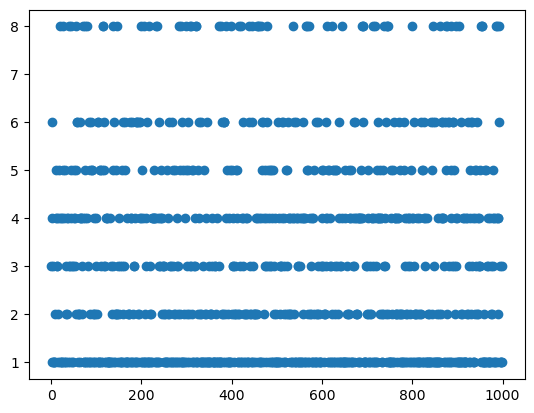

In [17]:
## "discrete" entropy

# generate data
N = 1000
numbers = np.ceil( 8*np.random.rand(N)**2 ) #this gives random rumber between 1 and 8
#we will use it later for the 2.220446049250313e-16 error
numbers[numbers==7] = 4
plt.plot(numbers,'o')

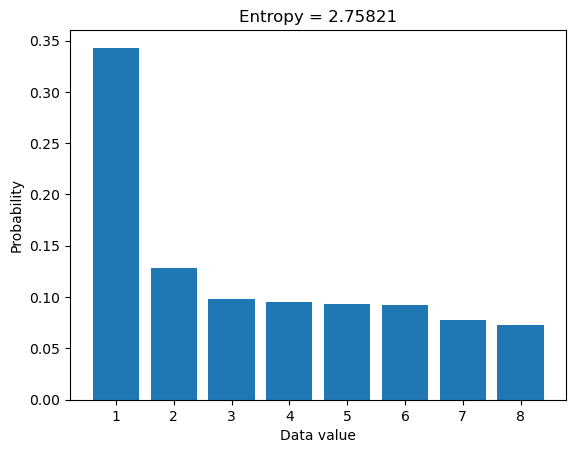

In [19]:
## "discrete" entropy

# generate data
N = 1000
numbers = np.ceil( 8*np.random.rand(N)**2 )


# get counts and probabilities
u = np.unique(numbers)
probs = np.zeros(len(u))

#finding the probability of each point to show again in the whole dataset
for ui in range(len(u)):
    probs[ui] = sum(numbers==u[ui]) / N

    
# compute entropy
entropee = -sum( probs*np.log2(probs+np.finfo(float).eps) )
#np.finfo(float).eps it's the machine precission error. it's value is 2.220446049250313e-16
#we removed number 7 and now we have probability of 0 for the number 7. if we don't include
#the np.finfo(float).eps we are having a 0 inside of the log. so we get -infinity. We add
#this number in order to prevent the minus infinity. It's ok thought to include this number
#because we will multiply everything with the probability of 0 which is 0.
#always include np.finfo(float).eps for entropy.

# plot
plt.bar(u,probs)
plt.title('Entropy = %g'%entropee)
plt.xlabel('Data value')
plt.ylabel('Probability')
plt.show()

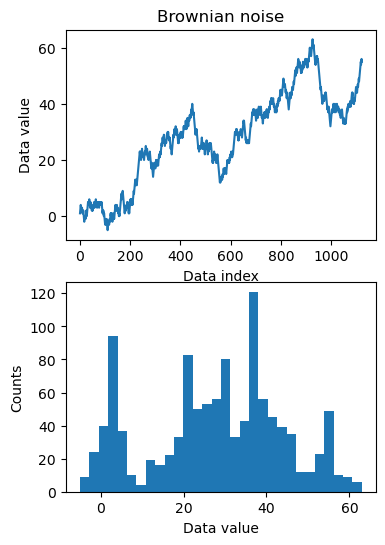

In [26]:
## for random variables

# create Brownian noise
N = 1123
#we get the cumulative sum of all the signs
#np.sign(np.random.randn(N)) will convert the positive number to +1 and the negative
#number to -1
brownnoise = np.cumsum( np.sign(np.random.randn(N)) )

fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(brownnoise)
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')
ax[0].set_title('Brownian noise')

ax[1].hist(brownnoise,30)
ax[1].set_xlabel('Data value')
ax[1].set_ylabel('Counts')
plt.show()

In [ ]:
### now compute entropy
# number of bins
nbins = 50

# bin the data and convert to probability
nPerBin,bins = np.histogram(brownnoise,nbins)
probs = nPerBin / sum(nPerBin)

# compute entropy
entro = -sum( probs*np.log2(probs+np.finfo(float).eps) )

print('Entropy = %g'%entro)